# Machine Learning Engineer Nanodegree

## Capstone Project

## Project: Car Evaluation

### Importing Necessary Libraries that are required for the project

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline

## Reading dataset into Pandas DataFrame

In [7]:
data=pd.read_csv('cardata.csv')

print '\nThe features present in our data are :\n\n',data.columns,'\n'

print "Displaying first 10 records of our dataset:"
display(data.head(10))


The features present in our data are :

Index([u'buying', u'maint', u'doors', u'persons', u'lug_boot', u'safety',
       u'class'],
      dtype='object') 

Displaying first 10 records of our dataset:


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Describing the data

In [8]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


#### By seeing the above data all the column attributes are equally distributed except class label.Lets see how it varies from other attributes using a plot.

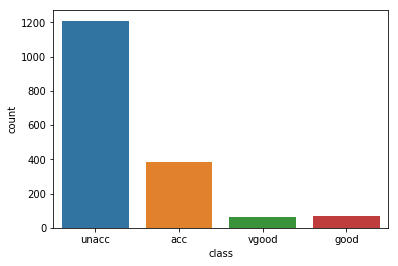

In [9]:
sns.countplot(data['class'])

#### By seeing the above graph, we can say that class label is very unbalanced with high values of 'unacc' i.e., around 1200 out of 1728 records.So this is a multiclass classification problem which is unbalanced.

The below graphs are the class distribution for each feature:


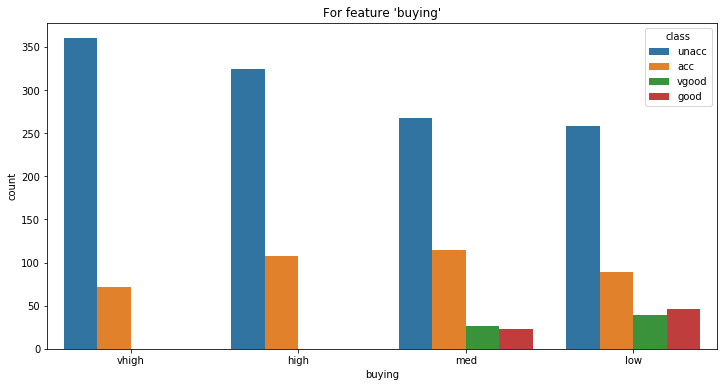

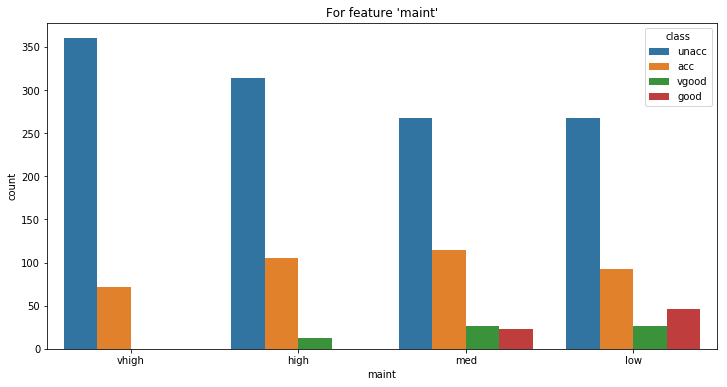

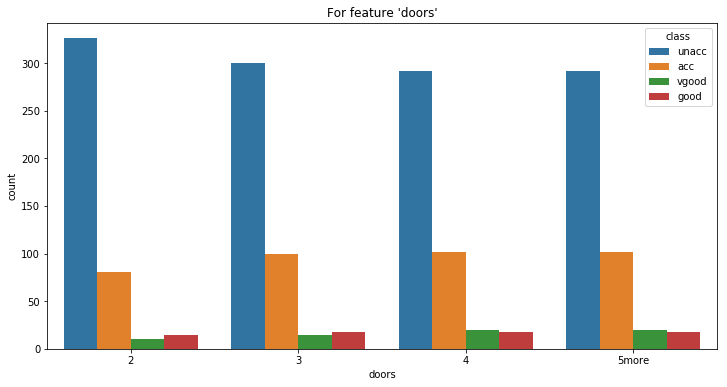

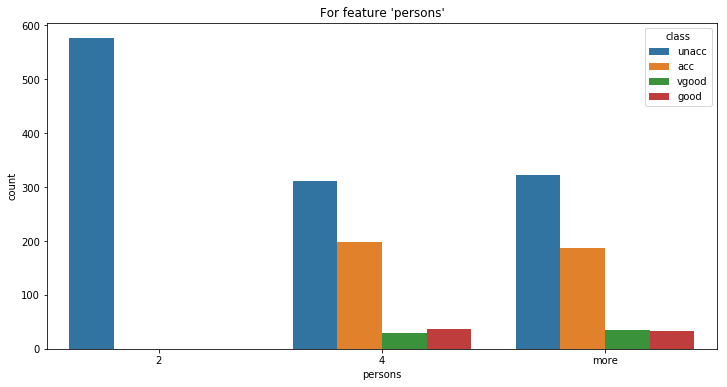

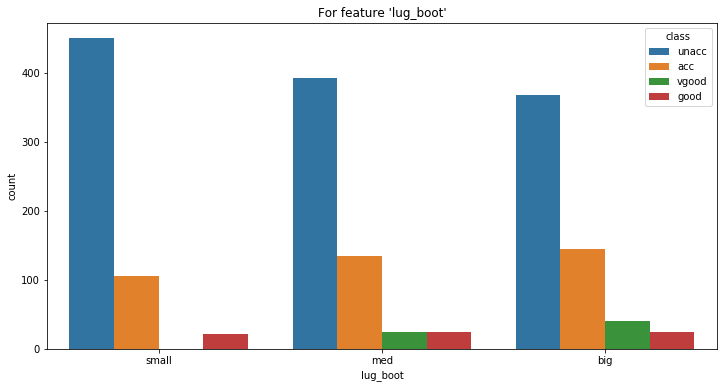

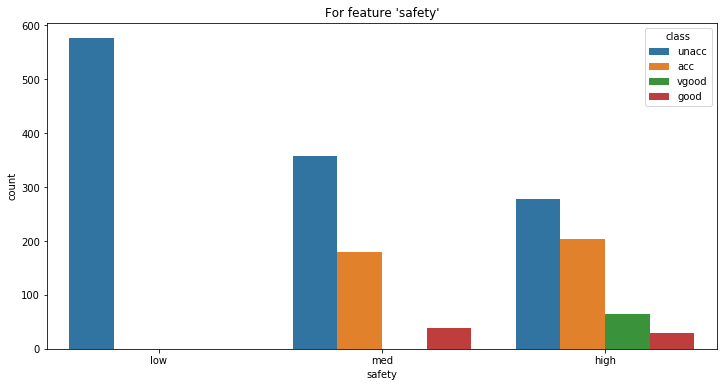

In [10]:
print "The below graphs are the class distribution for each feature:"
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

#### As my data is categorrical and sklearn algorithms do not work with string data i have to convert string data into numerical data. In order to convert string categories to numerical values we have a function called LabelEncoder which transforms string data into numerical data.

In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
    data[i]=l.fit_transform(data[i])
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


Heat Map:
Lets see how these attributes correlate with one another using pearson's correlation coefficient.


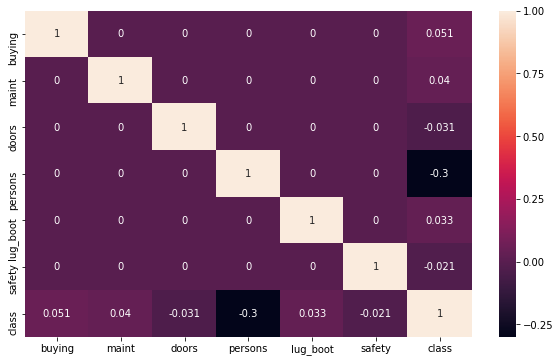

In [12]:
print "Heat Map:"
heat_map=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
print "Lets see how these attributes correlate with one another using pearson's correlation coefficient."

#### By seeing the above heatmap, I came to a idea that there is a no correlation exist between each and every attribute except class label.

In [13]:
X=data[data.columns[0:len(data.columns)-1]]
y=data['class']
print X[:10],y[:10]

   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2
5       3      3      0        0         1       0
6       3      3      0        0         0       1
7       3      3      0        0         0       2
8       3      3      0        0         0       0
9       3      3      0        1         2       1 0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: class, dtype: int64


Lets divide the data into train and test data using train_test_split function.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

## Selecting Models:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

#### As my data is unbalanced using accuracy as my metric is not a good option hence i will go with f1_score which is best among all metrics.

In [20]:
for i in [LogisticRegression,KNeighborsClassifier,RandomForestClassifier]:
    mod=i()
    mod=mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    f1score=f1_score(y_test,y_pred,average='weighted')
    print "using",i,'i got an f1_score of',f1score

using <class 'sklearn.linear_model.logistic.LogisticRegression'> i got an f1_score of 0.6100884895666437
using <class 'sklearn.neighbors.classification.KNeighborsClassifier'> i got an f1_score of 0.8896111598243296
using <class 'sklearn.ensemble.forest.RandomForestClassifier'> i got an f1_score of 0.9560159323845144


C:\Users\valla\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### From the above f1_score values of three classifiers we can say that RandomForestClassifier is giving better F1_score of 95.78, Hence we can take RandomForestClassifier as our solution model.

#### Now i can check with different parameters of RandomForestClassifier for more f1_score.By using GridSearchCV i can get best parameters that fits my data.

In [47]:
import random
for i in range(10):
    rfc=RandomForestClassifier(random_state=random.randrange(1,500,10))
    rfc.fit(X_train,y_train)
    print rfc.score(X_test,y_test)
    

0.9653179190751445
0.9508670520231214
0.9566473988439307
0.953757225433526
0.9508670520231214
0.9479768786127167
0.953757225433526
0.953757225433526
0.9421965317919075
0.9450867052023122


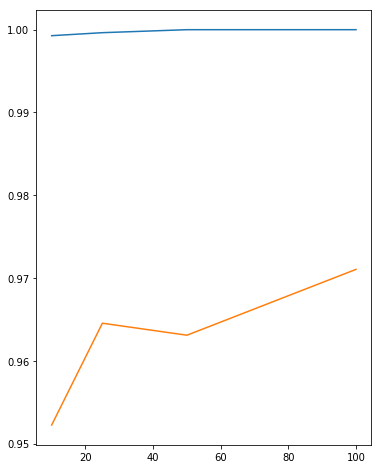

In [21]:
from sklearn.model_selection import validation_curve
param_range=[10,25,50,100]
curve=validation_curve(RandomForestClassifier(),X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

## Hyperparameter Tuning using GridSearchCV

In [115]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [116]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=29),
                  param_grid=param_grid,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_features': 2, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': 20}


#### Now i calculate the F1_score using the best parameters obtained by using GridSearchCV

In [117]:
clf=RandomForestClassifier(max_features=2, max_leaf_nodes=None, criterion='entropy', max_depth=20)
clf=clf.fit(X_train,y_train)
y_pred=mod.predict(X_test)
f1score=f1_score(y_test,y_pred,average='weighted')
print "using RandomForestClassifier with best parameters i got an f1_score of ",f1score


using RandomForestClassifier with best parameters i got an f1_score of  0.9578446519387169


Even after taking best parameters using gridsearchCV i got an F_Score of 95.78 which is same as above

## Conclusion

In [23]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
print(rfc.feature_importances_)

[0.17142423 0.17908856 0.06181634 0.20947376 0.08664885 0.29154826]


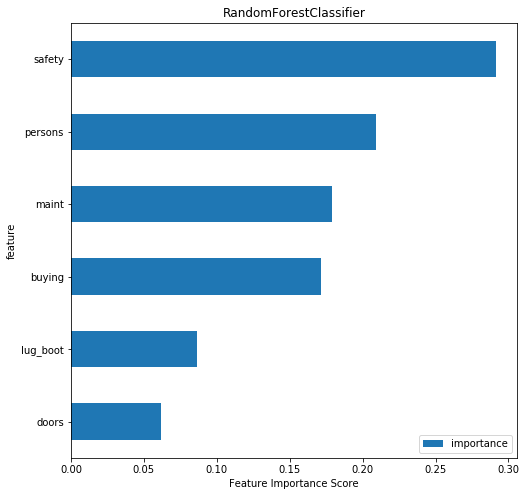

In [31]:
def plot_feature_importances(rfc, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
            
    feat_imp = pd.DataFrame({'importance':rfc.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp
_ = plot_feature_importances(rfc, X_train, y_train, top_n=X_train.shape[1], title=rfc.__class__.__name__)

RandomForestClassifier is the best model for this data among all other models with following parameters: n_estimators: 50 criterion: entropy max_depth: 10 max_features: 6 max_leaf_nodes: None
We are getting an F1_score of 
